<h1 style=text-align:center;color:brown;font:bold> Data PreProcessing </h1>

## Divided into 6 parts
    * Common Data preparation tasks
    * Data Cleaning
    * Feature Selection
    * Data Transformation
    * Feature engineering
    * Dimensionality Reduction

<h1 style=text-align:center;color:blue;font:bold> Feature Selection </h1>

<h1 style=text-align:left;color:purple;font:bold> Why Feature Selection ? </h1>

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in many cases, to improve the performance of the model. 

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.

As such, it can be challenging for a machine learning practitioner to select an appropriate statistical measure for a dataset when performing filter-based feature selection. In this tutorial, you will discover how to choose statistical measures for filter-based feature selection with numerical and categorical data.

* There are two main types of feature selection techniques: supervised and unsupervised, and supervised methods may be divided into wrapper, filter and intrinsic.

* Filter-based feature selection methods use statistical measures to score the correlation or dependence between input variables that can be filtered to choose the most relevant features.

* Statistical measures for feature selection must be carefully chosen based on the data type of the input variable and the output or response variable.

<h2 style=text-align:left;color:purple;font:bold> Statistics for Feature Selection </h2>

One way to think about feature selection methods are in terms of supervised and unsupervised methods. The difference has to do with whether features are selected based on the target variable or not.
>  Unsupervised Selection: Do not use the target variable (e.g. remove redundant variables).

>  Supervised Selection: Use the target variable (e.g. remove irrelevant variables).

Supervised feature selection methods may further be classified into three groups, including
intrinsic, wrapper, filter methods.
* Intrinsic: Algorithms that perform automatic feature selection during training.
* Filter: Select subsets of features based on their relationship with the target.
* Wrapper: Search subsets of features that perform according to a predictive model.

### Numerical Input, Numerical Output
* Pearson’s correlation coefficient (linear)
* Spearman’s rank coefficient (nonlinear)
* Mutual Information

### Numerical Input, Categorical Output
* ANOVA correlation coefficient (linear)
* Kendall’s rank coefficient (nonlinear)
* Mutual Information.

### Categorical Input, Numerical Output
* ANOVA correlation coefficient (linear)
* Kendall’s rank coefficient (nonlinear)
* Mutual Information.

### Categorical Input, Categorical Output
* Chi-Squared test (contingency tables)
* Mutual Information (information gain)

<h2 style=text-align:left;color:purple;font:bold> Feature Selection With Any Data Type </h2>

* Tree-Searching Methods (depth-first, breadth-first, etc.)
* Stochastic Global Search (simulated annealing, genetic algorithm)

Simpler methods involve systematically adding or removing features from the model until no further improvement is seen. This includes so-called step-wise models

* Step-Wise Models
* RFE

A final data type agnostic method is to score input features using a model and use a filter-based feature selection method. Many models will automatically select features or score features as part of fitting the model and these scores can be used just like the statistical methods described above. Decision tree algorithms and ensembles of decision tree algorithms provide a input variable data type agnostic method of scoring input variables, including algorithms such as:

* Classification and Regression Trees (CART)
* Random Forest
* Bagged Decision Trees
* Gradient Boosting

<h2 style=text-align:left;color:purple;font:bold> How to Select Categorical input features </h2>

### Categorical Feature Selection
* Chi-squared statistic
* Mutual information statistic

In [3]:
# load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
# load the dataset
def load_dataset(filename):
    data = pd.read_csv(filename,header=None)
    dataset = data.values
    X = dataset[:,:-1]
    y = dataset[:,-1]
    X = X.astype(str)
    return X, y

# prepare input data
def prepare_inputs(X, X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare output data
def prepare_outputs(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

def select_features_chi2(X_train_enc, y_train_enc, X_test_enc):
    fs = SelectKBest(score_func=chi2, k = "all")
    fs.fit(X_train_enc, y_train_enc)
    X_train_enc_fs = fs.transform(X_train_enc)
    X_test_enc_fs = fs.transform(X_test_enc)
    return X_train_enc_fs, X_test_enc_fs, fs

def select_features_mutualinfo(X_train_enc, y_train_enc, X_test_enc):
    fs = SelectKBest(score_func=mutual_info_classif, k = "all")
    fs.fit(X_train_enc, y_train_enc)
    X_train_enc_fs = fs.transform(X_train_enc)
    X_test_enc_fs = fs.transform(X_test_enc)
    return X_train_enc_fs, X_test_enc_fs, fs

Feature scores using chi2
Feature 0 : 0.003227
Feature 1 : 0.269693
Feature 2 : 6.239899
Feature 3 : 102.498674
Feature 4 : 16.425408
Feature 5 : 12.775301
Feature 6 : 0.381045
Feature 7 : 0.110901
Feature 8 : 9.139402

Feature scores using mutual information
Feature 0 : 0.052850
Feature 1 : 0.007079
Feature 2 : 0.036395
Feature 3 : 0.015867
Feature 4 : 0.043971
Feature 5 : 0.045042
Feature 6 : 0.000000
Feature 7 : 0.000000
Feature 8 : 0.053357




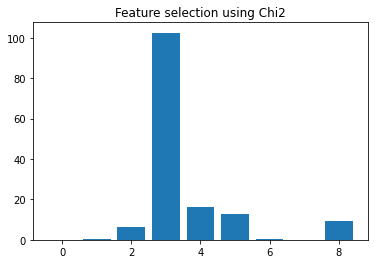

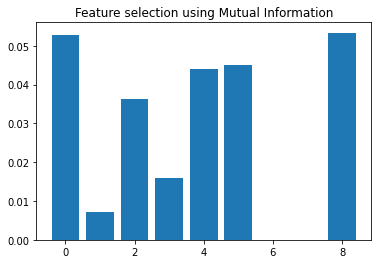

In [5]:
# Load the dataset
X, y = load_dataset("/Users/manideepbangaru/Documents/EDAnMLApply/Datasets/breast-cancer.csv")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

# Prepare input data
X_train_enc, X_test_enc = prepare_inputs(X, X_train,X_test)

# Prepare output data
y_train_enc, y_test_enc = prepare_outputs(y_train, y_test)

# feature selection using Chi2
X_train_enc_fs_chi2, X_test_enc_fs_chi2, fs_chi2 = select_features_chi2(X_train_enc, y_train_enc, X_test_enc)

# feature selection using mutualinfo
X_train_enc_fs_mi, X_test_enc_fs_mi, fs_mi = select_features_mutualinfo(X_train_enc, y_train_enc, X_test_enc)

# scores for the features
print("Feature scores using chi2")
for i in range(len(fs_chi2.scores_)):
    print("Feature %s : %f"%(i,fs_chi2.scores_[i]))

print("\nFeature scores using mutual information")
for i in range(len(fs_mi.scores_)):
    print("Feature %s : %f"%(i,fs_mi.scores_[i]))

# plot the scores
print("\n")
plt.bar([i for i in range(len(fs_chi2.scores_))],fs_chi2.scores_)
plt.title("Feature selection using Chi2")
plt.show()

print("\n")
plt.bar([i for i in range(len(fs_mi.scores_))],fs_mi.scores_)
plt.title("Feature selection using Mutual Information")
plt.show()


> Chi2 : We could see from the above graph that only 5 features are relevant, so we can set k value to 5

> Mutual Info : We could see that 7 features are relevant, so we can set k value to 7

In [6]:
# Modify the feature selection functions by defining k value
def select_features_chi2(X_train_enc, y_train_enc, X_test_enc):
    fs = SelectKBest(score_func=chi2, k = 4)
    fs.fit(X_train_enc, y_train_enc)
    X_train_enc_fs = fs.transform(X_train_enc)
    X_test_enc_fs = fs.transform(X_test_enc)
    return X_train_enc_fs, X_test_enc_fs, fs

def select_features_mutualinfo(X_train_enc, y_train_enc, X_test_enc):
    fs = SelectKBest(score_func=mutual_info_classif, k = 7)
    fs.fit(X_train_enc, y_train_enc)
    X_train_enc_fs = fs.transform(X_train_enc)
    X_test_enc_fs = fs.transform(X_test_enc)
    return X_train_enc_fs, X_test_enc_fs, fs

### Build the model

In [7]:
# Load the dataset
X, y = load_dataset("/Users/manideepbangaru/Documents/EDAnMLApply/Datasets/breast-cancer.csv")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

# Prepare input data
X_train_enc, X_test_enc = prepare_inputs(X, X_train,X_test)

# Prepare output data
y_train_enc, y_test_enc = prepare_outputs(y_train, y_test)

# feature selection using Chi2
X_train_enc_fs_chi2, X_test_enc_fs_chi2, fs_chi2 = select_features_chi2(X_train_enc, y_train_enc, X_test_enc)

# feature selection using mutualinfo
X_train_enc_fs_mi, X_test_enc_fs_mi, fs_mi = select_features_mutualinfo(X_train_enc, y_train_enc, X_test_enc)

# Build the models

# model without any feature selection
model1 = LogisticRegression(solver="lbfgs")
model1.fit(X_train_enc, y_train_enc)
y_pred1 = model1.predict(X_test_enc)
accuracy1 = accuracy_score(y_test_enc,y_pred1) * 100
print("Without any Feature selection accuracy is : %.2f"%(accuracy1))

# model using chi2 feature selection
model2 = LogisticRegression(solver="lbfgs")
model2.fit(X_train_enc_fs_chi2, y_train_enc)
y_pred2 = model2.predict(X_test_enc_fs_chi2)
accuracy2 = accuracy_score(y_test_enc,y_pred2) * 100
print("With chi2 Feature selection accuracy is : %.2f"%(accuracy2))

# model using Mutual Information feature selection
model3 = LogisticRegression(solver="lbfgs")
model3.fit(X_train_enc_fs_mi, y_train_enc)
y_pred3 = model3.predict(X_test_enc_fs_mi)
accuracy3 = accuracy_score(y_test_enc,y_pred3) * 100
print("With Mutual information Feature selection accuracy is : %.2f"%(accuracy3))

Without any Feature selection accuracy is : 77.89
With chi2 Feature selection accuracy is : 81.05
With Mutual information Feature selection accuracy is : 81.05


> Looks like here, Chi2 is doing a better job. Neverthless we have to try with KFold to be sure of the accuracy

<h2 style=text-align:left;color:purple;font:bold> How to Select Numerical input features </h2>

### ANOVA F-test Feature Selection

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [9]:
# loading the dataset
def load_dataset(filename):
    data = pd.read_csv(filename)
    dataset = data.values
    X = dataset[:,:-1]
    y = dataset[:,-1]
    return X, y

In [10]:
# feature selection using anova
def select_features_anova(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all') # learn relationship from training data fs.fit(X_train, y_train)
    # fit the model
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [11]:
# feature selection using mutual information
def select_features_mutualinfo(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k = "all")
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [12]:
# load the dataset
X, y = load_dataset("/Users/manideepbangaru/Documents/EDAnMLApply/Datasets/Diabetes/pima-indians-diabetes.csv")

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# feature selection using anova
X_train_fs_anova, X_test_fs_anova, fs_anova = select_features_anova(X_train, y_train, X_test)

# feature selection using mutual information
X_train_fs_mi, X_test_fs_mi, fs_mi = select_features_mutualinfo(X_train, y_train, X_test)

Text(0.5, 1.0, 'Feature Importance using ANOVA')

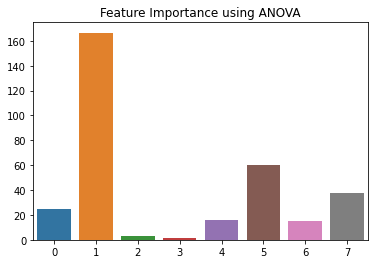

In [13]:
sns.barplot(x= [ele for ele in range(len(fs_anova.scores_))],y = fs_anova.scores_).set_title("Feature Importance using ANOVA")

Text(0.5, 1.0, 'Feature Importance using Mutual information')

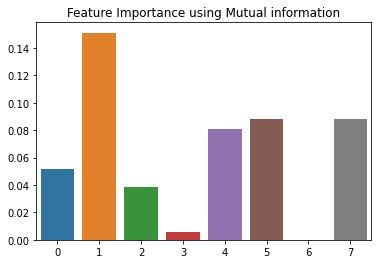

In [14]:
sns.barplot(x= [ele for ele in range(len(fs_mi.scores_))],y = fs_mi.scores_).set_title("Feature Importance using Mutual information")

In [15]:
# feature selection using anova
def select_features_anova(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k=6) # learn relationship from training data fs.fit(X_train, y_train)
    # fit the model
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection using mutual information
def select_features_mutualinfo(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k = 7)
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [16]:
# Building the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Build the model on ANOVA selected features
X_train_fs_anova, X_test_fs_anova, fs_anova = select_features_anova(X_train, y_train, X_test)
model = LogisticRegression(solver="liblinear")
model.fit(X_train_fs_anova, y_train)
y_pred_fs_anova = model.predict(X_test_fs_anova)

# Build the model on Mutual information selected features
X_train_fs_mi, X_test_fs_mi, fs_mi = select_features_mutualinfo(X_train, y_train, X_test)
model = LogisticRegression(solver = "liblinear")
model.fit(X_train_fs_mi, y_train)
y_pred_fs_mi = model.predict(X_test_fs_mi)

In [17]:
scores = []
scores.append(accuracy_score(y_test, y_pred))
scores.append(accuracy_score(y_test, y_pred_fs_anova))
scores.append(accuracy_score(y_test, y_pred_fs_mi))
print(scores)

[0.7705627705627706, 0.7575757575757576, 0.7489177489177489]


(0.0, 1.0)

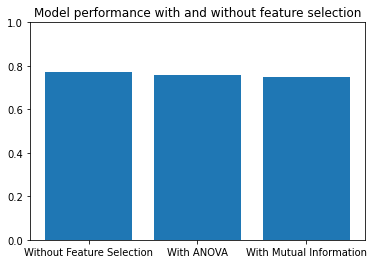

In [18]:
plt.bar(["Without Feature Selection","With ANOVA","With Mutual Information"],scores)
plt.title("Model performance with and without feature selection")
plt.ylim((0,1))

### Tune the number of selected features

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [24]:
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)

# define the pipeline to evaluate
model = LogisticRegression(solver="liblinear")
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps = [("anova",fs),("Logistic regression",model)])

# define the grid
grid = dict()
grid["anova__k"] = [i+1 for i in range(X.shape[1])]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring="accuracy", n_jobs=-1, cv = cv,)
# perform the search
results = search.fit(X,y)

### Trying everything together

In [25]:
# compare different numbers of features selected using anova f-test
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y

# define dataset
X, y = load_dataset('./Datasets/Diabetes/pima-indians-diabetes.csv')
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv) # perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.770
Best Config: {'anova__k': 7}


<h2 style=text-align:left;color:purple;font:bold> Select Features for Numerical Output </h2>

In [35]:
# Loading packages
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [30]:
# Generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
    random_state=1)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

There are two popular feature selection techniques that can be used for numerical input data and a numerical target variable. They are:

* Correlation Statistics
* Mutual information statistic

## Correlation feature selection

Linear correlation scores are typically a value between -1 and 1 with 0 representing no relationship. For feature selection, scores are made positive and we are often interested in a positive score with the larger the positive value, the larger the relationship, and, more likely, the feature should be selected for modeling.

The scikit-learn machine library provides an implementation of the correlation statistic in the f regression() function.


Feature 0: 0.676394
Feature 1: 0.227226
Feature 2: 2.948043
Feature 3: 16.185863
Feature 4: 0.661409
Feature 5: 0.000947
Feature 6: 0.073255
Feature 7: 0.746426
Feature 8: 0.118246
Feature 9: 2.392029
Feature 10: 0.432820
Feature 11: 0.059458
Feature 12: 3.601130
Feature 13: 0.274198
Feature 14: 0.767942
Feature 15: 0.508380
Feature 16: 0.201558
Feature 17: 0.306831
Feature 18: 0.048381
Feature 19: 0.364422
Feature 20: 0.225479
Feature 21: 164.042525
Feature 22: 0.010064
Feature 23: 0.003793
Feature 24: 1.112643
Feature 25: 22.414237
Feature 26: 0.618829
Feature 27: 0.405430
Feature 28: 0.041991
Feature 29: 0.053305
Feature 30: 0.988714
Feature 31: 0.435192
Feature 32: 0.344619
Feature 33: 0.227774
Feature 34: 0.949549
Feature 35: 2.499593
Feature 36: 1.201643
Feature 37: 0.012403
Feature 38: 0.931705
Feature 39: 1.931209
Feature 40: 2.842812
Feature 41: 0.010763
Feature 42: 1.049634
Feature 43: 0.589685
Feature 44: 2.069790
Feature 45: 0.156982
Feature 46: 0.180266
Feature 47: 0.87971

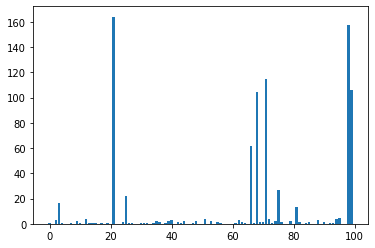

In [33]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all') 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
    random_state=123)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

The plot clearly shows 8 to 10 features are a lot more important than the other features. We could set k = 10 When configuring the SelectKBest to select these top features

## Mutual Information Feature Selection

Feature 0: 0.045484
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.024816
Feature 5: 0.000000
Feature 6: 0.022659
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.074320
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.020390
Feature 15: 0.004307
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.016566
Feature 19: 0.003688
Feature 20: 0.007579
Feature 21: 0.018640
Feature 22: 0.025206
Feature 23: 0.017967
Feature 24: 0.069173
Feature 25: 0.000000
Feature 26: 0.022232
Feature 27: 0.000000
Feature 28: 0.007849
Feature 29: 0.012849
Feature 30: 0.017402
Feature 31: 0.008083
Feature 32: 0.047321
Feature 33: 0.002829
Feature 34: 0.028968
Feature 35: 0.000000
Feature 36: 0.071652
Feature 37: 0.027969
Feature 38: 0.000000
Feature 39: 0.064796
Feature 40: 0.137695
Feature 41: 0.008732
Feature 42: 0.003983
Feature 43: 0.000000
Feature 44: 0.009387
Feature 45: 0.000000
Feature 46: 0.038385
Feature 47: 0.000000
Fe

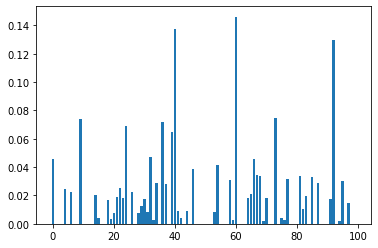

In [34]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all') # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
    random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

<h2 style=text-align:left;color:purple;font:bold> How to use RFE for Feature selection </h2>

### RFE for Classification

In [2]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
    random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5) 
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.885 (0.031)


In [4]:
# make a prediction with an RFE pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
    random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5) 
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# fit the model on all available data
pipeline.fit(X, y)

# make a prediction for one example
data = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057,
    -2.48924933, -1.93094078, 3.26130366, 2.05692145]]

yhat = pipeline.predict(data) 

print('Predicted Class: %d' % (yhat))

Predicted Class: 1


### RFE for Regression

In [6]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5) 
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv,
n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -26.885 (2.621)


In [9]:
# make a regression prediction with an RFE pipeline
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5) 
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# fit the model on all available data
pipeline.fit(X, y)

# make a prediction for one example
data = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381,
    0.87616892, -0.50446586, 0.23009474, 0.76201118]]

yhat = pipeline.predict(data) 
print('Predicted: %.3f' % (yhat))

Predicted: -84.288
